In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Data.xlsx'
data = pd.read_excel(file_path, sheet_name=0 ,header=None)

column_labels = data.iloc[0, 1:].values

feature_vector = data.iloc[1:1087, 1:].transpose()
feature_vector.columns = [f'Feature_{i+1}' for i in range(feature_vector.shape[1])]

additional_features = data.iloc[1086:, 0].values
additional_values = data.iloc[1086:, 1:].transpose()
additional_values.columns = additional_features

combined_df = pd.concat([feature_vector, additional_values], axis=1)
combined_df.columns = [str(col) for col in combined_df.columns]

# combined_df.head()

In [2]:
import pandas as pd

df = pd.read_excel('Data.xlsx', header=None, skiprows=1)

feature_vector = df.iloc[0:1086, :]

additional_features = df.iloc[1087:1099, :]

feature_vector.reset_index(drop=True, inplace=True)
additional_features.reset_index(drop=True, inplace=True)


feature_vector_T = feature_vector.transpose()
additional_features_T = additional_features.transpose()

full_data = pd.concat([feature_vector_T, additional_features_T], axis=1)

full_data.reset_index(drop=True, inplace=True)


df = full_data
df = df.drop(0, axis=0)
# df

In [3]:

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Reset index for the final DataFrame
df.reset_index(drop=True, inplace=True)

df.head()

pd.set_option('display.max_columns', None)  

one_hot_encoded_data = pd.get_dummies(df, columns = ['Digester', 'Source', 'Type', 'Waste', 'Biomass'])
# print(one_hot_encoded_data)
df_use = one_hot_encoded_data

In [4]:
df_use.head()

d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium  \
0                                                  0                                                  
1                                                  0                                                  
2                                                  0                                                  
3                                                  0                                                  
4                                                  0                                                  

  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides  \
0                                                  0                                             
1                                                  0                                             
2                                                  0                                             
3                                                  0                                             
4                                                  0                                             

  d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia  \
0                                                  0                                          
1                                                  0                                          
2                                           0.021516                                          
3                                                  0                                          
4                                                  0                                          

  d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella  \
0                                                  0                                                                       
1                                                  0                                                                       
2                                                  0                                                                       
3                                                  0                                                                       
4                                                  0                                                                       

  d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Veillonella  \
0                                                  0                                                               
1                                                  0                                                               
2                                                  0                                                               
3                                                  0                                                               
4                                                  0                                                               

  d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium  \
0                                                  0                                                                
1                                                  0                                                                
2                                                  0                                                                
3                                                  0                                                                
4                                                  0                                                                

  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellacea

## LR

/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_4078/417195690.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)


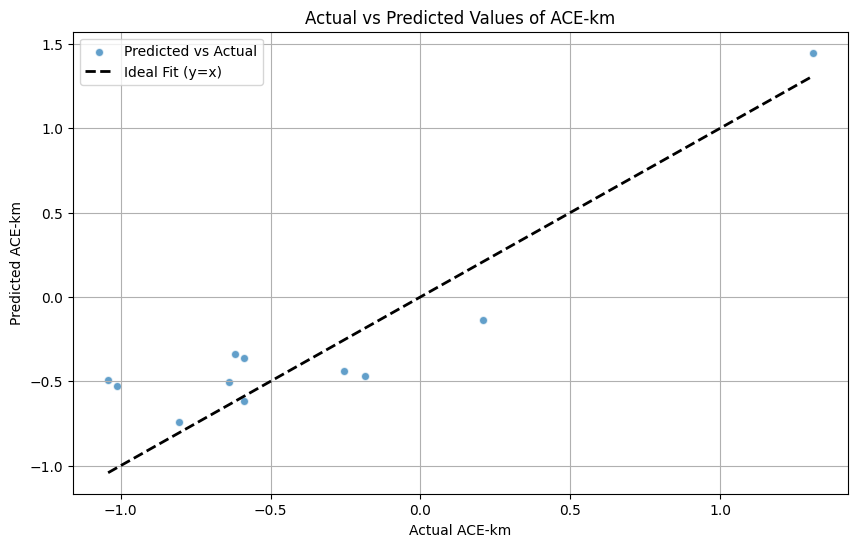


Test Set Metrics for ACE-km:
Mean Squared Error: 0.0854
R-squared: 0.7906


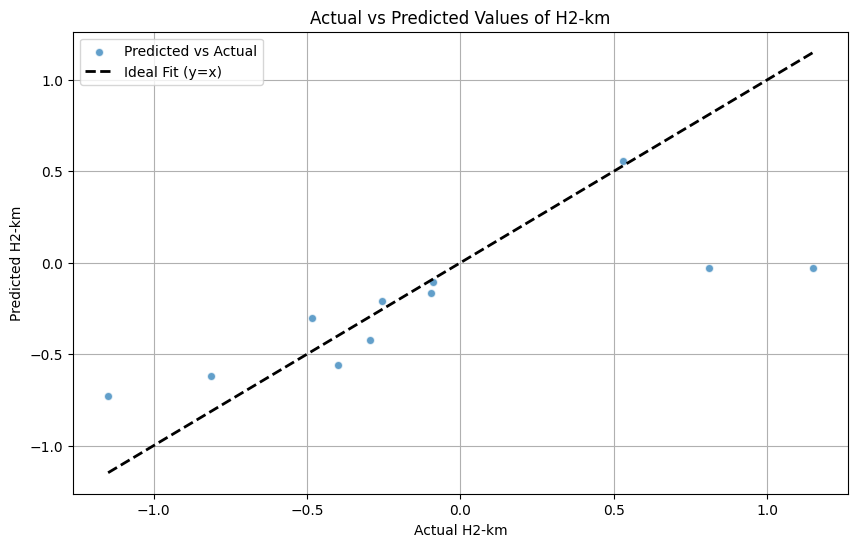


Test Set Metrics for H2-km:
Mean Squared Error: 0.2168
R-squared: 0.4913


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Apply feature scaling (standardization)
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

# Convert the data to float if necessary
df_cleaned = df_cleaned.astype(np.float32)

# Iterate over each target column
for target_column in target_columns:
    # Split features and target for the current target column
    X = df_cleaned.drop(columns=target_columns).values  # Features
    y = df_cleaned[target_column].values  # Target

    # Perform a simple train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Linear Regression model
    lr_model = LinearRegression()

    # Train the Linear Regression model
    lr_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test)

    # Calculate MSE and R² for the test set
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit (y=x)')
    
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print test set results
    print(f"\nTest Set Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_test:.4f}")
    print(f"R-squared: {r2_test:.4f}")

/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_4078/854146770.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)


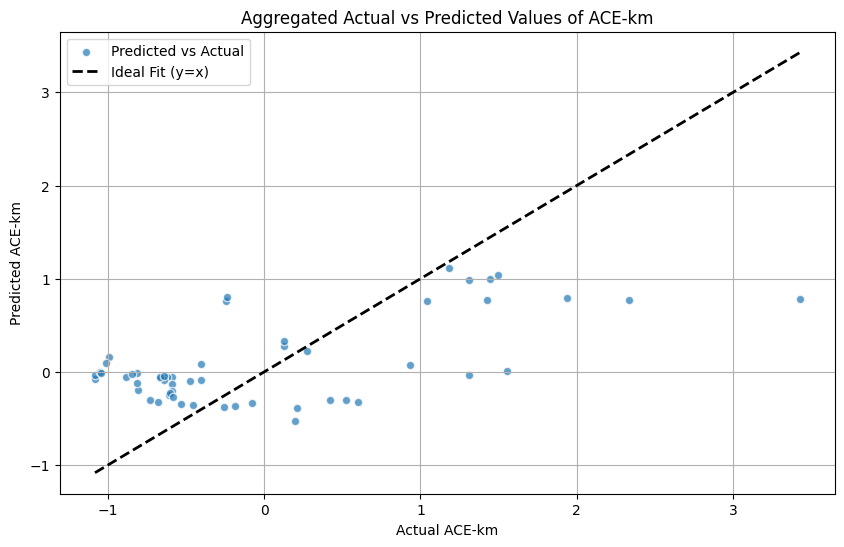


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 0.6517
R-squared: 0.3483


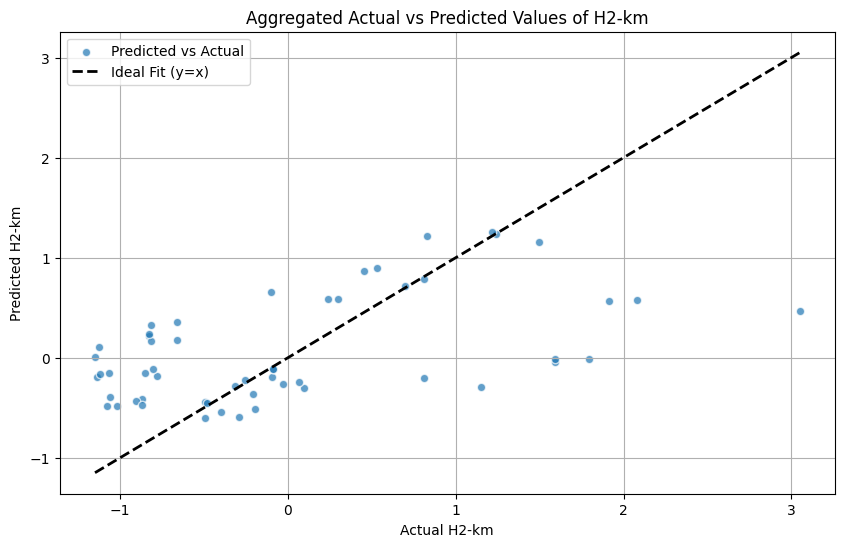


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 0.7217
R-squared: 0.2783


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns or group columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Identify groups based on digester columns
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply feature scaling (standardization)
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

# Convert the data to float if necessary
df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Iterate over each target column
for target_column in target_columns:
    # Split features and target for the current target column
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    # Lists to store aggregated results for the final metric calculation
    y_tests = []
    y_preds = []

    # Perform cross-validation using Leave-One-Group-Out
    for train_index, test_index in logo.split(X, y, groups):
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Ensure that the labels (y_train, y_test) are floats as well
        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        # Initialize the Linear Regression model
        lr_model = LinearRegression()

        # Train the Linear Regression model
        lr_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = lr_model.predict(X_test)

        # Append actual and predicted values for aggregated calculations
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate overall MSE and R² for all aggregated predictions
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot aggregated actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit (y=x)')
    
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall cross-validation results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


ModuleNotFoundError: No module named 'tensorflow.keras'

/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_4078/464426991.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


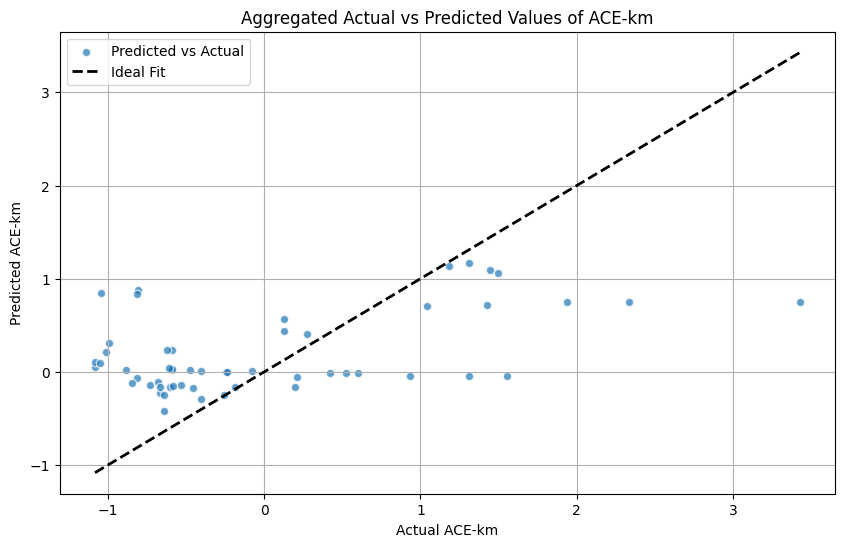


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 0.7781
R-squared: 0.2219


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


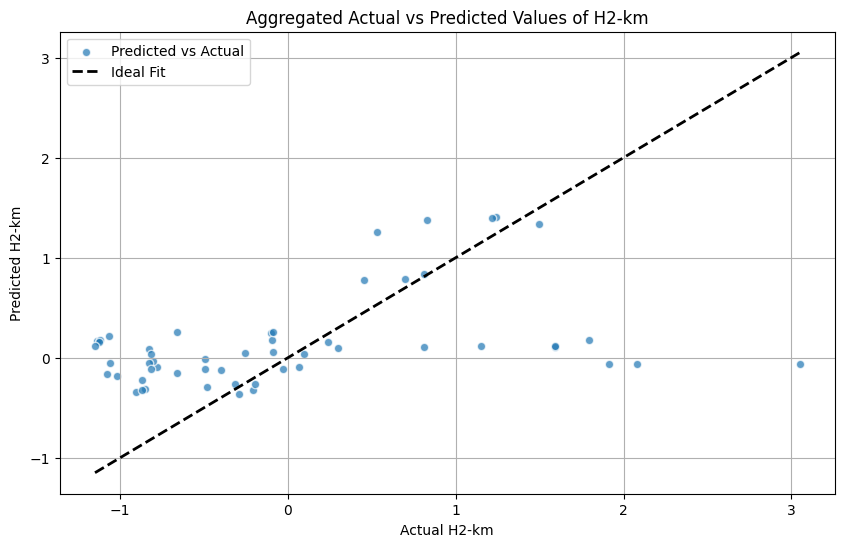


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 0.8476
R-squared: 0.1524


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_24421/4092624221.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


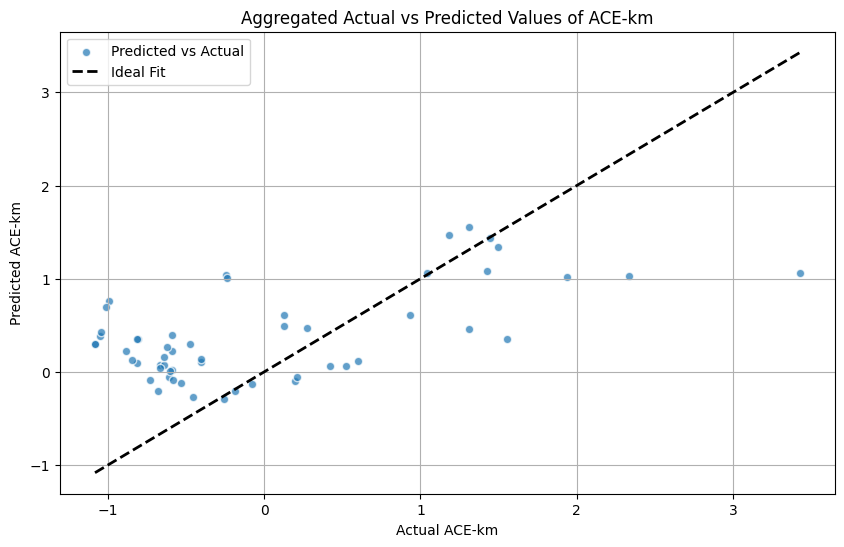


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 0.7902
R-squared: 0.2098


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


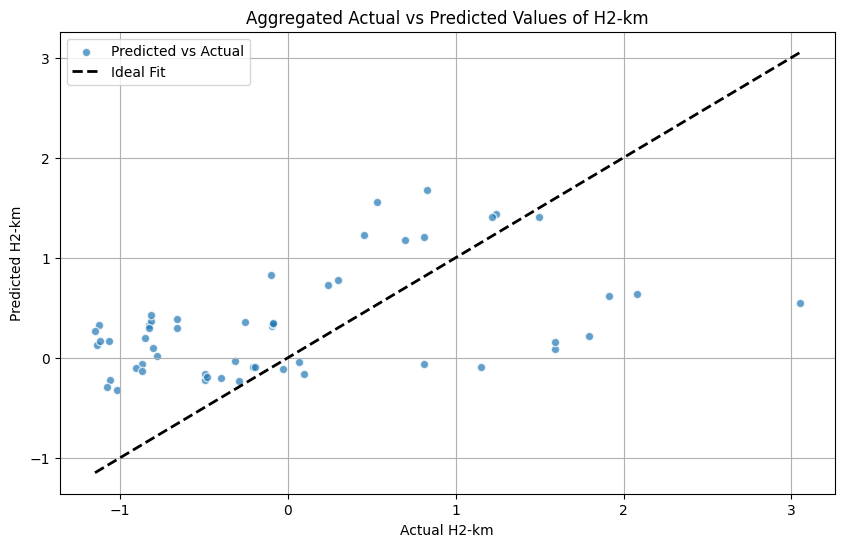


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 0.8780
R-squared: 0.1220


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_59537/1005916340.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[feature_columns] = scaler.fit_transform(df_cleaned[feature_columns])
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


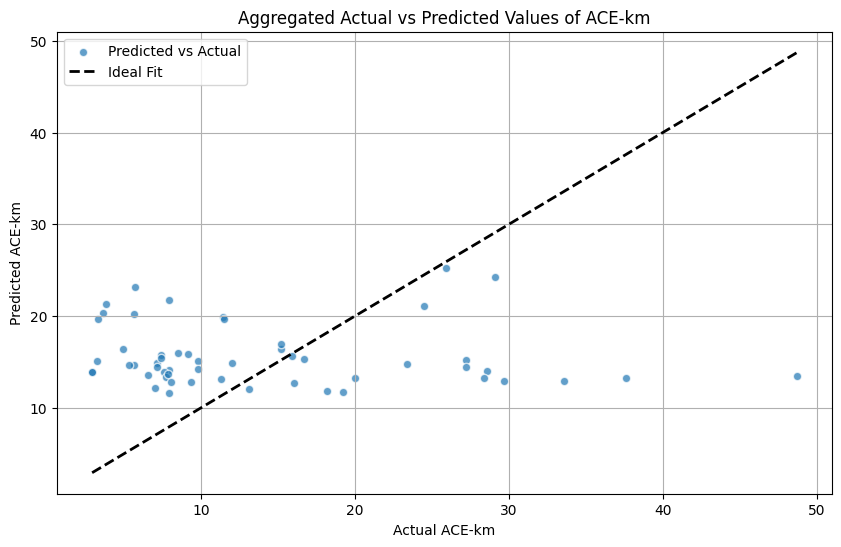


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 123.0286
R-squared: -0.1914


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


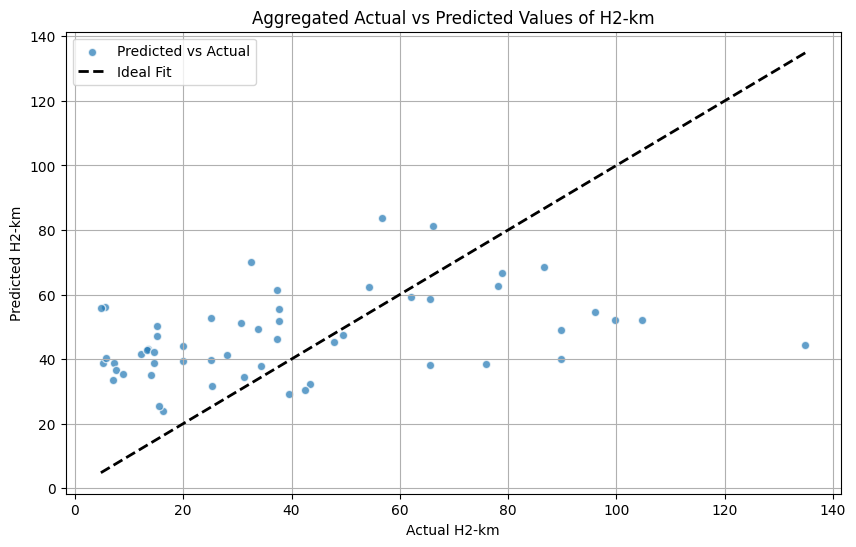


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 858.7194
R-squared: 0.1065


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

# Scale only the feature columns, not the target columns
feature_columns = df_cleaned.drop(columns=target_columns).columns

scaler = StandardScaler()

# Apply scaling only to the feature columns
df_cleaned[feature_columns] = scaler.fit_transform(df_cleaned[feature_columns])

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  # Features only
    y = df_cleaned[target_column].values  # Keep targets unscaled

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


-------

/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-10-23 14:47:38.710056: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-23 14:47:38.710083: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-23 14:47:38.710088: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-23 14:47:38.710110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-23 14:47:38.710126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


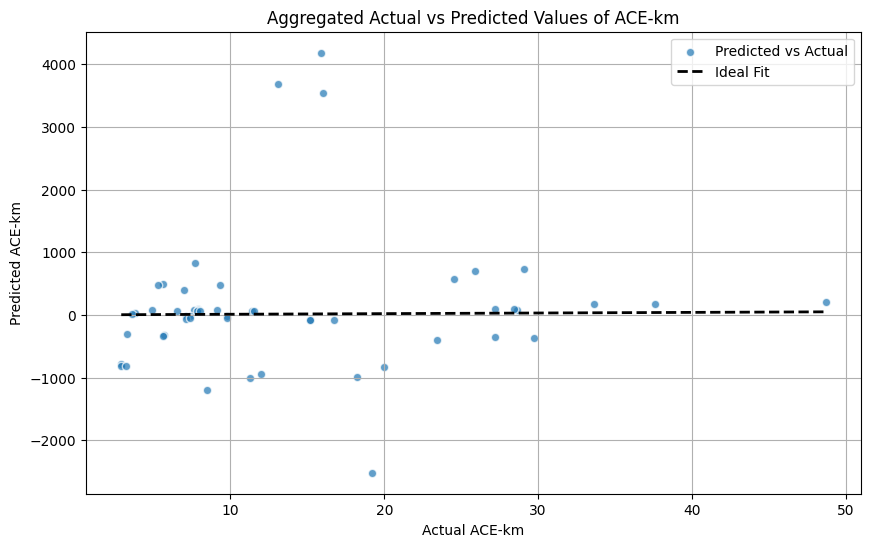


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 1120574.3750
R-squared: -10850.8974


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

# The target columns you want to predict
target_columns = ['ACE-km', 'H2-km']

# Assuming 'df_use' is your DataFrame, removing rows with invalid entries
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Digester column identification for groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Identify the groups for LeaveOneGroupOut cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# No scaling applied, raw values are used directly
df_cleaned = df_cleaned.astype(np.float32)

# LeaveOneGroupOut cross-validation setup
logo = LeaveOneGroupOut()

# Loop over each target column
for target_column in target_columns:
    # Separate features (X) and target (y)
    X = df_cleaned.drop(columns=target_columns).values  # Use raw feature values
    y = df_cleaned[target_column].values  # Use raw target values

    # Reshape input features to match Conv1D input format
    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    # Cross-validation loop
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the model with the correct input shape
        model = build_model((X_train.shape[1], 1))

        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Make predictions
        y_pred = model.predict(X_test).flatten()

        # Store the true and predicted values for evaluation
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate evaluation metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print evaluation metrics
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_59537/392612655.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-10-21 12:10:36.363008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-21 12:10:36.363037: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-21 12:10:36.363046: I met

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


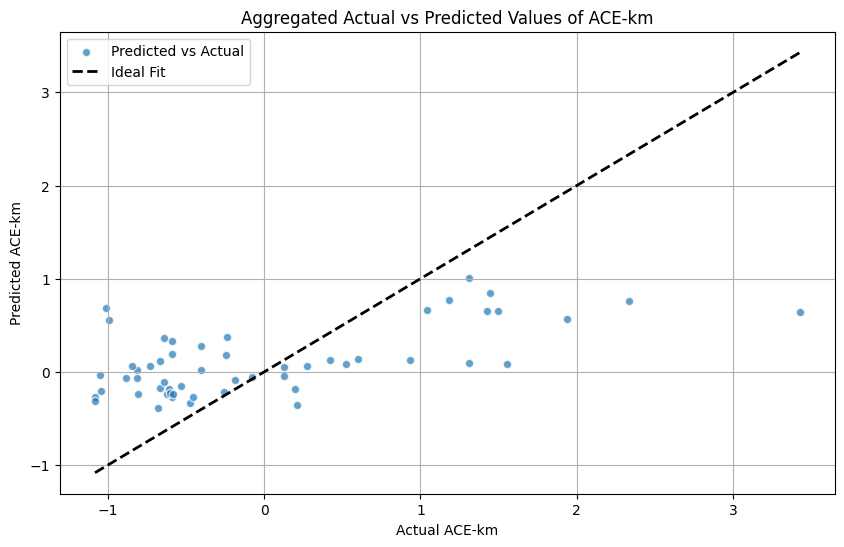


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 0.6907
R-squared: 0.3093


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


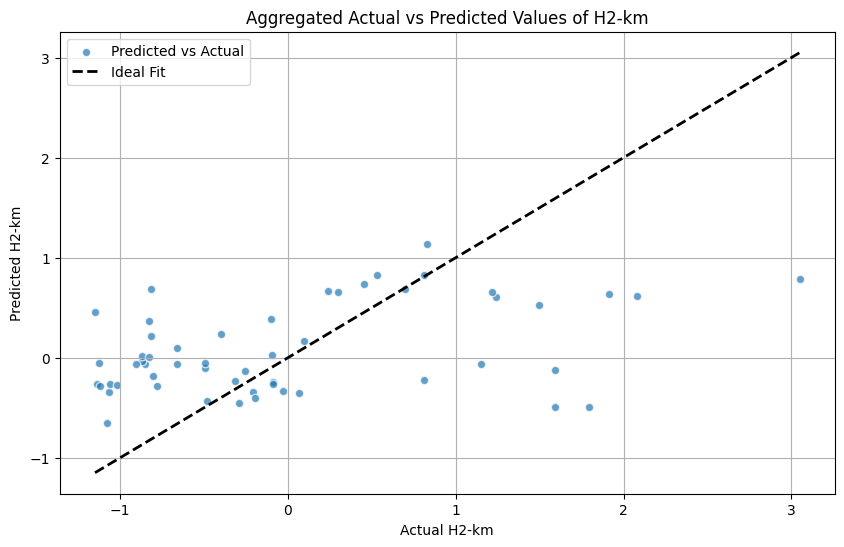


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 0.8235
R-squared: 0.1765


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model with fully connected layers
# def build_model(input_shape):
#     model = Sequential([
#         Flatten(input_shape=input_shape),  
#         Dense(128, activation='relu'), 
#         Dropout(0.2), 
#         Dense(128, activation='relu'), 
#         Dropout(0.2),
#         Dense(64, activation='relu'),   
#         Dropout(0.1),
#         Dense(32, activation='relu'),   
#         Dropout(0.1),
#         Dense(16, activation='relu'),   
#         Dense(1)  
#     ])
    
#     model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
#     return model

def build_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),  # Flatten input
        Dense(256, activation='relu'),  # Increased neurons to 256
        Dropout(0.3),  # Higher dropout for regularization
        Dense(256, activation='relu'),  # Another layer with 256 neurons
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")



/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_33814/4101955264.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 75s 75s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


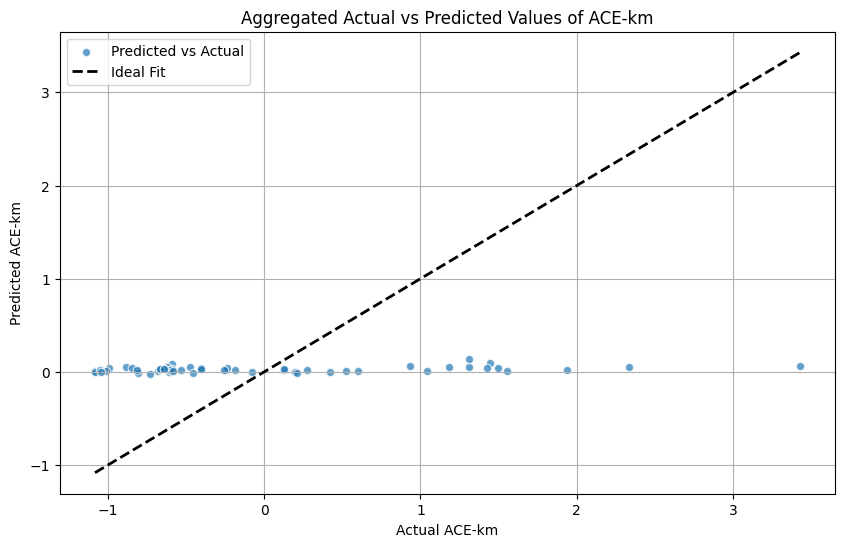


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 0.9798
R-squared: 0.0202


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Function to build the neural network model with fully connected layers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.layers import Add, Input

def build_residual_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # First Conv1D Block
    x = Conv1D(128, kernel_size=1, activation='relu')(inputs)
    x = Conv1D(128, kernel_size=1, activation='relu')(x)
    shortcut = x  # Create a shortcut
    
    # Second Conv1D Block
    x = Conv1D(128, kernel_size=1, activation='relu')(x)
    x = Conv1D(128, kernel_size=1, activation='relu')(x)
    
    # Add the residual connection
    x = Add()([x, shortcut])  # Adding the shortcut to the output
    
    # Continue with the remaining Conv1D layers
    x = Conv1D(64, kernel_size=1, activation='relu')(x)
    x = Conv1D(64, kernel_size=1, activation='relu')(x)
    x = Conv1D(64, kernel_size=1, activation='relu')(x)
    
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model



target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=75, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),  # Increased dropout rate for regularization
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),  # Increased dense layer size for more capacity
        Dropout(0.3),  # Add Dropout before the final layers
        Dense(64, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.00005))  # Slightly reduced learning rate
    return model

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Assuming df_cleaned is the preprocessed DataFrame without 'x' and other invalid values
# Let's scale the data first (StandardScaler for inputs, MinMaxScaler for targets)
scaler_X = StandardScaler()
scaler_y = MinMaxScaler()

# Preprocessing and scaling the features
X = df_cleaned.drop(columns=target_columns).values  # All features except target
y = df_cleaned[target_columns].values  # Target columns

# Reshaping the input data for Conv1D (samples, timesteps, features)
X = scaler_X.fit_transform(X)
X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)

# Groups for cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Loop over each target variable
for i, target_column in enumerate(target_columns):
    y_target = y[:, i].reshape(-1, 1)
    y_target_scaled = scaler_y.fit_transform(y_target)  # Scaling the target variable

    y_tests = []
    y_preds = []

    # Use GroupKFold for better cross-validation
    gkf = GroupKFold(n_splits=5)

    for train_index, test_index in gkf.split(X, y_target_scaled, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_target_scaled[train_index], y_target_scaled[test_index]

        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0,
                  validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

        # Predict on the test set
        y_pred = model.predict(X_test).flatten()

        # Rescale predictions and actual values back to original scale
        y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test_rescaled = scaler_y.inverse_transform(y_test).flatten()

        # Store results
        y_tests.extend(y_test_rescaled)
        y_preds.extend(y_pred_rescaled)

    # Calculate evaluation metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title(f'Aggregated Actual vs Predicted Values for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print results
    print(f"\nCross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")



NameError: name 'digester_columns' is not defined